# Machine Learning Online Class 
# Exercise 2: Logistic Regression

#  Instructions
In this exercise, you will implement logistic regression and apply it to two
different datasets. Before starting on the programming exercise, we strongly
recommend watching the video lectures and completing the review questions
for the associated topics.
To get started with the exercise, you will need to download the starter
code and unzip its contents to the directory where you wish to complete the
exercise. If needed, use the cd command in Octave/MATLAB to change to
this directory before starting this exercise.
You can also find instructions for installing Octave/MATLAB in the “En-
vironment Setup Instructions” of the course website.

```
%  ------------
%
%  This file contains code that helps you get started on the second part
%  of the exercise which covers regularization with logistic regression.
%
%  You will need to complete the following functions in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the X values and the third column
%  contains the label (y).

data = load('ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

plotData(X, y);

% Put some labels
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('ex2data2.txt', delimiter=",")
X = data[:, :2] # 118x2
y = data[:, 2] # (118,)

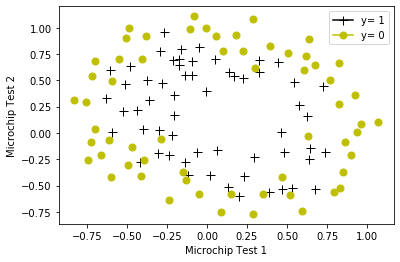

In [3]:
from plotData import plotData
plot, one, zero= plotData(X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend((one, zero), ('y= 1', 'y= 0'))
plt.show()

## =========== Part 1: Regularized Logistic Regression ==========

```
%  In this part, you are given a dataset with data points that are not
%  linearly separable. However, you would still like to use logistic
%  regression to classify the data points.
%
%  To do so, you introduce more features to use -- in particular, you add
%  polynomial features to our data matrix (similar to polynomial
%  regression).
%

% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled
X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros) - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

fprintf('\nProgram paused. Press enter to continue.\n');
pause;

% Compute and display cost and gradient
% with all-ones theta and lambda = 10
test_theta = ones(size(X,2),1);
[cost, grad] = costFunctionReg(test_theta, X, y, 10);

fprintf('\nCost at test theta (with lambda = 10): %f\n', cost);
fprintf('Expected cost (approx): 3.16\n');
fprintf('Gradient at test theta - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

fprintf('\nProgram paused. Press enter to continue.\n');
pause;
```

In [4]:
y = y.reshape(-1,1) #(118,1)
from mapFeature import mapFeature
from costFunctionReg import costFunctionReg
# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept term is handled
New = mapFeature(X[:,0], X[:,1])

# Initialize fitting parameters
initial_theta = np.zeros((New.shape[1], 1))

# Set regularization parameter lambda to 1
lbd = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad= costFunctionReg(initial_theta, New, y, lbd)

print('Cost at initial theta (zeros): {:.3f}'.format(cost[0,0]))
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
for i in range(5):
    print('{:.4f}'.format(grad[i,0]))
print('\nExpected gradients (approx) - first five values only:\n')
print('0.0085\n0.0188\n0.0001\n0.0503\n0.0115\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

0.0085
0.0188
0.0001
0.0503
0.0115

Expected gradients (approx) - first five values only:

0.0085
0.0188
0.0001
0.0503
0.0115



## ========== Part 2: Regularization and Accuracies ===========
```
%  Optional Exercise:
%  In this part, you will get to try different values of lambda and
%  see how regularization affects the decision coundart
%
%  Try the following values of lambda (0, 1, 10, 100).
%
%  How does the decision boundary change when you vary lambda? How does
%  the training set accuracy vary?
```

In [5]:
lbd =1
# Initialize fitting parameters
initial_theta = np.zeros((New.shape[1], 1))

In [6]:
from sigmoid import sigmoid
def J_costFunctionReg(theta, *args):
    """
    """
    # Args
    X, y, lbd = args
    # Reshape 
    X = X.reshape(-1, len(theta))
    y = y.reshape(-1, 1)
    theta = theta.reshape(-1, 1)
    m = len(y) # number of samples
    # Compute J 
    z = X.dot(theta) 
    h_z = sigmoid(z) 
    reg = lbd/(2*m) * (theta[1:].T.dot(theta[1:]))
    J = (-1/m) *(y.T.dot(np.log(h_z)) + (1-y).T.dot(np.log(1- h_z))) + reg
    return J

In [7]:
def grad_costFunctionReg(theta, *args):
    """
    """
    # Args
    X, y, lbd = args
    # Reshape
    X = X.reshape(-1, len(theta))
    y = y.reshape(-1, 1)
    theta = theta.reshape(-1, 1)
    # Compute grad of theta
    grad = np.zeros(theta.shape) # initial theta
    m = len(y) # number of samples
    z = X.dot(theta) 
    h_z = sigmoid(z) 
    theta[0] = 0
    
    grad = (1/m)*X.T.dot(h_z - y) + (lbd/m)*theta
    return grad.ravel()

In [8]:
from scipy.optimize import fmin_bfgs
result_optimize = fmin_bfgs(f=J_costFunctionReg, 
                            fprime=grad_costFunctionReg,
                            x0=initial_theta.ravel(), 
                            args=(New.ravel(), y.ravel(), lbd, ),
                            maxiter=400, 
                            full_output=1, 
                            disp=1)  

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


In [9]:
theta = result_optimize[0]

In [10]:
from predict import predict
pred = predict(theta, New)
print('Train Accuracy: ', np.mean(pred == y.flatten()) * 100)
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')

Train Accuracy:  83.05084745762711
Expected accuracy (with lambda = 1): 83.1 (approx)



/home/duc/Workspace/training-duc-machine-learning-andrew-ng/week3/[Python]machine-learning-ex2/plotDecisionBoundary.py:54: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p3 = plt.contour(u, v, z, levels=[0], linewidth=2).collections[0]


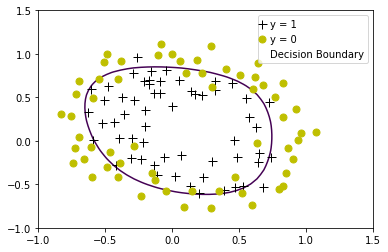

In [12]:
from plotDecisionBoundary import plotDecisionBoundary
# Plot Boundary
plotDecisionBoundary(theta, New, y)